# <u>Chapter 7: Integrals</u>

### <u>Weighting:</u>
We have been using flat probability $P(x)=\dfrac{1}{b-a}$. We can generalize more easily to probability $\dfrac{w(x)}{b-a}$ from $a$ to $b$ and $\emptyset$ elsewhere. <br><br>
$$\begin{array}{}
\underline{\text{Population Mean: }} &
\mu_f\equiv E\big(f(X)\big)=\displaystyle{\frac{1}{b-a}\int_a^b} \underset{\text{weight function}}{\underbrace{w(x)}_{}f(x)dx} \\
\underline{\text{Sample Mean: }} & \overline{f}=\displaystyle{\frac{1}{n}}\sum_{i=0}^{n-1}f(X_i)
\end{array}$$ <br>
Notice that the only difference is that the random variable samples $X_i$ are randomly drawn from $\dfrac{w(x)}{b-a}$; everything else remains unchanged. <br><br>
The pratical formula for <i>Monte Carlo integration with a general weight function</i> is: <br><br>
$$\int_a^bw(x)f(x)dx\approx\frac{b-a}{n}\sum_{i=0}^{n-1}f(X_i)\pm\frac{b-a}{\sqrt{n-1}}\sqrt{\frac{1}{n}\sum_{i=0}^{n-1}f^2(X_i)-\left(\frac{1}{n}\sum_{i=0}^{n-1}f(X_i)\right)^2}$$ <br>
We either need to draw randomly from non-uniform distribution or convert $\displaystyle{\int w(x)f(x)}dx$ to $\displaystyle{\int\tilde{f}(x)}dx$ by substiution and use the original formula.
##### <u>Side note:</u>
Transformation method to generate random variable from some non-uniform probability distribution: we draw a uniform number $u\in[0,1]$ and want to generate a random number from any probability distribution $P(x)$. <br><br>
$$\begin{array}{}
    p(u)=\left\{
    \begin{array}{}
        1\text{ for }0\leq u\leq 1 \\
        0\text{ otherwise}
    \end{array}
    \right. &
    \displaystyle{\int_{-\infty}^\infty}p(u)du=1
\end{array}$$ <br>
Conservation of probability requires that <br><br>
$$\begin{align}
    |p(u)du|=|P(x)dx| \;\Longrightarrow\; &\int_{-\infty}^u p(u')du'=\int_{-\infty}^xP(x')dx' \\
    &\; \int_0^u1du'=\int_{-\infty}^xP(x')dx' \;\Longrightarrow\; u=\int_{-\infty}^\infty P(x')dx
\end{align}$$ <br>
need to solve for $x$ given a randomly generated $u$. <br><br>
Let $P(x)=A(1+ax^2)$, where $x\in[-1,1]$. We must normalize $P(x)$ via $\displaystyle{\int_{-1}^1}P(x)dx=1$, solving for $A$. <br><br>
$$\begin{align}
    u &= \int_{-\infty}^xP(x')dx'= \int_{-1}^x A(1+ax'^2)dx' \\
    &= A\left(x+\frac{a}{3}x^3+1+\frac{a}{3}\right)\Longrightarrow\text{solve for }x
\end{align}$$ <br>
There is an easier way however$-$ rejection method.
* Let $P(x)=1+ax^2$, where again $x\in[-1,1]$ (notice that this time, we don't need to normalize). <br><br>
<ul style="list-style-type:square">
    <li>Generate uniform $x'\in[-1,1)$.</li> <br>
    <li>Generate uniform $y'\in[0,1+a]$.</li> <br>
</ul>
If $y'<P(x')$, accept the drawn value $x'$.

<img src="chapter%207%20-%20rejection%20method%20graph.png" width="500">
</img> <br>
<center> $\color{red} \blacksquare$ <font color="red">= accept</font> </center>

$
% references: https://stackoverflow.com/questions/14675913/changing-image-size-in-markdown
% image made through Overleaf via LaTeX using PGFplots
$

### <u>Inverse Transform Sampling:</u>
Let $g(x)$ be cumulative distribution function <br><br>
$$g(x)=\int_a^xw(x')dx'$$ <br>
where $g(a)=0$ and $g(b)=b-a$. <br><br>
By the Second Fundamental Theorem of Calculus, <br><br>
$$\begin{gather}
    F(x)=\int_a^xf(x)dx \;\Longrightarrow\; F'(x)=f(x) \\
    \int_a^bw(x)f(x)dx=\int_a^bf(x)\frac{dg}{dx}dx
\end{gather}$$ <br>
Let $u=g(x)$. So $x=g^{-1}(u)$ and $du=g'(x)dx$. <br><br>
$$\begin{align}
    \int_a^bf(x)\frac{dg}{dx}dx &= \int_a^bf\big(g^{-1}(g(x))\big)\frac{dg}{dx}dx \\
    &= \int_0^{b-a}f\big(g^{-1}(u)\big)du \\
    &\approx\frac{b-a}{n}\sum_{i=0}^{n-1}f\big(g^{-1}(U_i)\big)
\end{align}$$ <br>
where $U_i$ are uniformly distributed from $0$ to $b-a$.

### Inverse sampling of an exponential 

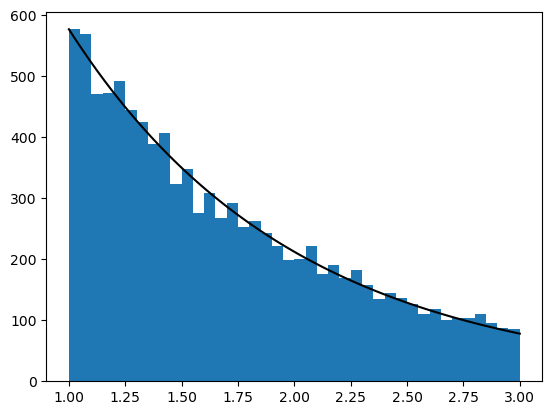

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from math import e

def uniform(a, b, n):
    np.random.seed(99999)
    return np.random.uniform(a, b, n)

ys = uniform(0, 2, 10000)
xv = np.linspace(1,3,100)

c = 2*e**3/(e**2 - 1)
xs = -np.log(1/e - ys/c)
ct = plt.hist(xs, 40)
plt.plot(xv, np.exp(-xv)*ct[0][0]*e, "k-")

In [4]:
ev

2.718281828459045

### Inverse-sampled Monte Carlo Integration for $\underline{\mathcal{Ex: }}$ $\displaystyle{\int_1^3}e^{-x}\sin xdx$
Let $w(x)=ce^{-x}$ and $f(x)=\frac{\sin x}{c}$ <br><br>
$$\begin{gather}
    \int_1^3ce^{-x}dx=3-1 \;\Longrightarrow\; c=\frac{2e^3}{e^2-1} \\
    g(x)=c\int_1^xe^{-x'}dx'=c(e^{-1}-e^{-x})
\end{gather}$$
Let $u(x)=c(e^{-1}-e^{-x})$ <br><br>
$$\begin{align}
    e^{-x}=e^{-1}-\frac{u}{c} &\;\Longrightarrow\; x=-\ln\left(e^{-1}-\frac{u}{c}\right)=g^{-1}(u) \\
    \int_1^3ce^{-x}\frac{\sin x}{c}dx &= \int_0^2\frac{1}{c}\sin\left(-\ln\left(e^{-1}-\frac{u}{c}\right)\right)du \\
    &\approx \frac{2}{n}\sum_{i=0}^{n-1}\frac{1}{c}\sin\left(-\ln\left(e^{-1}-\frac{U_i}{c}\right)\right)
\end{align}$$ <br>
where $U_i$ are randomly drawn from $0$ to $2$.

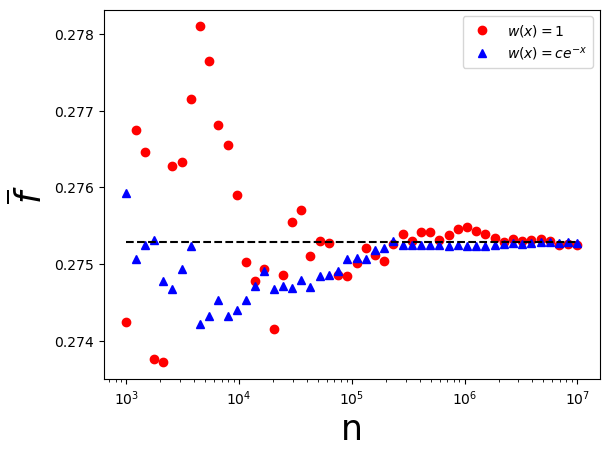

In [35]:
import numpy as np
import matplotlib.pyplot as plt

f = lambda x: np.exp(-x)*np.sin(x)

def uniform(a, b, n):
    np.random.seed(99999)
    return np.random.uniform(a, b, n)

def stats(fs):
    n = fs.size
    fbar = np.sum(fs)/n
    fsq = np.sum(fs**2)/n
    varfbar = (fsq - fbar**2)/(n-1)
    return fbar, np.sqrt(varfbar)

def montecarlo(f, a, b, n, opt="normal"):
    ys = uniform(a, b, n)
    
    if opt == "normal":
        fs = f(ys)
    elif opt == "inverse":
        ev = np.exp(1)
        c = 2*ev**3/(ev**2 - 1)
        xs = -np.log(1/ev - ys/c)
        fs = np.sin(xs)/c
        
    fbar, err = stats(fs)
    return (b-a)*fbar, (b-a)*err

ns = np.logspace(3, 7, 50).astype(int)
vnorm = np.zeros(ns.size)
vinv = np.zeros(ns.size)
for i,n in enumerate(ns): #built-in func 'enumerate' seems useful: https://www.geeksforgeeks.org/enumerate-in-python/
    fbar_n, err_n = montecarlo(f, 1, 3., n)
    vnorm[i] = fbar_n
    fbar_i, err_i = montecarlo(f, 0., 2., n, opt="inverse")
    vinv[i] = fbar_i
    
plt.plot(ns, vnorm, "ro", label="$w(x)=1$")
plt.plot(ns, vinv, "b^", label="$w(x)=ce^{-x}$")
plt.plot(ns, np.ones(ns.size)*0.27529, "k--")
plt.xscale("log")
plt.ylabel("$\overline{f}$", fontsize=25)
plt.xlabel("n", fontsize=25)
plt.legend(loc=1)